<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Data_Science/blob/main/Estat%C3%ADstica_com_Python_parte_1_Frequ%C3%AAncias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. Qual o seu tipo de Dado?**

**Dataset do projeto**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/datasets/alura_curssos/Estatística com Python parte 1 Frequências e Medidas'

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv(path + '/dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


**Tipos de dados**

*Variáveis quantitativas ordinais*

In [ ]:
sorted(dados["Anos de Estudo"].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

*Variáveis quantitativas nominais*

In [ ]:
sorted(dados["UF"].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [ ]:
sorted(dados["Sexo"].unique())

[0, 1]

In [ ]:
sorted(dados["Cor"].unique())

[0, 2, 4, 6, 8]

*Variáveis qualitativas discretas*

In [ ]:
dados["Idade"].min()

13

In [ ]:
dados["Idade"].max()

99

*Variáveis qualitativas contínuas*

In [ ]:
dados["Altura"].min()

1.339244614

In [ ]:
dados["Altura"].max()

2.028496765

# **02. Distribuicao de frequência**

**Distribuição de frequências qualitativas - Método 1**

In [ ]:
dados["Sexo"].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [ ]:
dados["Sexo"].value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [ ]:
frequencia = dados["Sexo"].value_counts()

In [ ]:
percentual = dados["Sexo"].value_counts(normalize = True) * 100

In [ ]:
dist_freq_qualitativas = pd.DataFrame({"Frequencia": frequencia, "Percentual": percentual})

In [ ]:
dist_freq_qualitativas

,Frequencia,Percentual
0,53250,69.299844
1,23590,30.700156


In [ ]:
dist_freq_qualitativas.rename(index={0 : "Masculino", 1 : "Femenino"}, inplace=True)

In [ ]:
dist_freq_qualitativas

,Frequencia,Percentual
Masculino,53250,69.299844
Femenino,23590,30.700156


**Distribuição de frequências qualitativas - Método 2**

In [ ]:
sexo = {0: "Masculino",
        1: "Femenino"}

cor = {0: "Indígena",
       2: "Branca",
       4: "Preta",
       6: "Amarelo",
       8: "Parda",
       9: "Sem Declarção"}

In [ ]:
frequencia = pd.crosstab(dados["Sexo"], dados["Cor"])
frequencia.rename(index= sexo, inplace=True)
frequencia.rename(columns= cor, inplace=True)

In [ ]:
frequencia

Cor,Indígena,Branca,Preta,Amarelo,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [ ]:
percentual = pd.crosstab(dados["Sexo"], dados["Cor"], normalize=True) * 100
percentual.rename(index= sexo, inplace=True)
percentual.rename(columns= cor, inplace=True)

In [ ]:
percentual

Cor,Indígena,Branca,Preta,Amarelo,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


**Distribuição de frequências quantitativas - Classes personalizadas**

In [ ]:
dados["Renda"].min()

0

In [ ]:
dados["Renda"].max()

200000

In [ ]:
classes = [0, 1574, 7880, 15700, 2000000]

In [ ]:
labels = ["E", "D", "C", "B", "A"]

In [ ]:
pd.cut(x = dados.Renda,
        bins = classes,
        labels = labels,
        include_lowest = True)

ValueError: ignored

**Distribuição de frequências quantitativas - Classes de amplitude fixa**

In [ ]:
import numpy as np

In [ ]:
n = dados.shape[0]
n

In [ ]:
k = 1 + (10/3) * np.log10(n)
k

**Histograma**

In [ ]:
import seaborn as sns

In [ ]:
ax = sns.displot(dados["Altura"], kde = False)

In [ ]:
dados["Altura"].hist(bins=50)

# **03. Medidas de tendêcia central**

**Média**

In [ ]:
df = pd.DataFrame(data = {"Fulano": [8, 10, 4, 8, 6, 10, 8],
                         "Beltrano": [6, 5, 7, 10, 4, 5, 6],
                         "Sicrano": [7, 5, 6, 5, 8, 5, 2]},
                         index = ["Matemática",
                                  "Português", 
                                  "Inglês", 
                                  "Geografia", 
                                  "História", 
                                  "Física", 
                                  "Química"] )
df.rename_axis("Matérias", axis= "columns", inplace=True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,6,7
Português,10,5,5
Inglês,4,7,6
Geografia,8,10,5
História,6,4,8
Física,10,5,5
Química,8,6,2


In [ ]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    6.142857
Sicrano     5.428571
dtype: float64

In [ ]:
df["Fulano"].mean()

7.714285714285714

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
dados.groupby(["Sexo"]).mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


In [ ]:
dados.groupby(["Sexo"])["Renda"].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

**Mediana**

In [ ]:
df

In [ ]:
notas_fulano = df["Fulano"]
notas_fulano

In [ ]:
notas_fulano.median()

**Moda e sua definição**

In [ ]:
df

In [ ]:
df.mode()

In [ ]:
dados["Renda"].mode()

# **04. Medidas seperatizes**

**Quartis, decis e percentis**

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
dados["Renda"].median()

1200.0

In [ ]:
dados["Renda"].quantile([0.25, 0.5,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [ ]:
[i/10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
dados["Renda"].quantile([i/10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

**Boxplot**

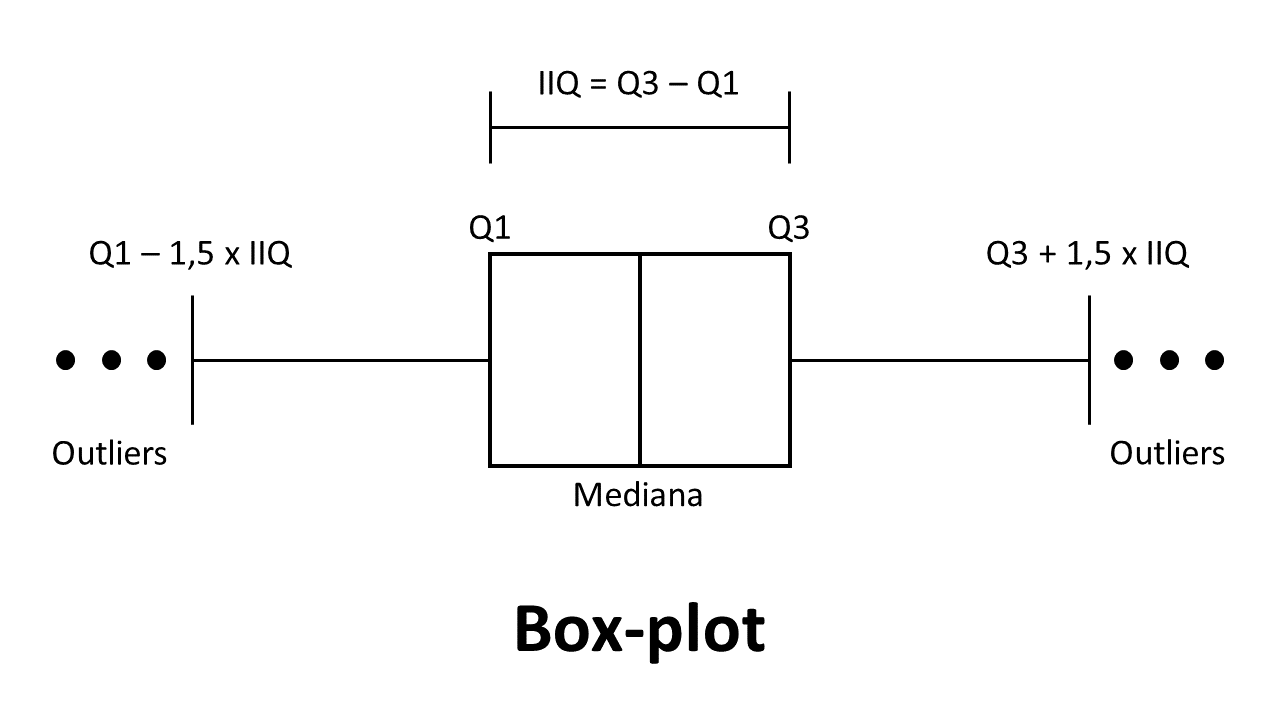

In [ ]:
import seaborn as sns

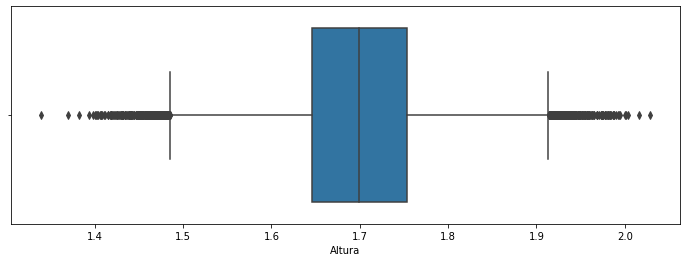

In [ ]:
ax =sns.boxplot(x="Altura", data= dados, orient="h")
ax.figure.set_size_inches(12,4)

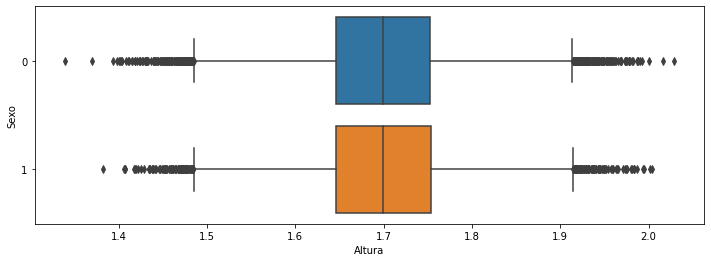

In [ ]:
ax =sns.boxplot(x="Altura", y="Sexo", data= dados, orient="h")
ax.figure.set_size_inches(12,4)

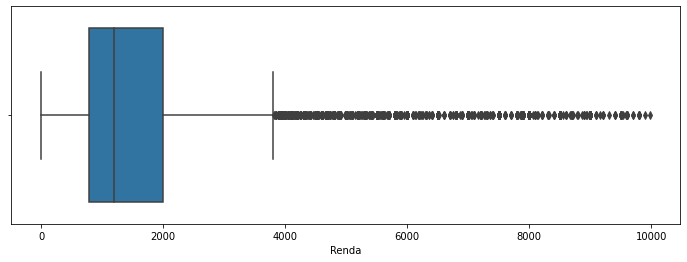

In [ ]:
ax =sns.boxplot(x="Renda", data= dados.query("Renda<10000"), orient="h")
ax.figure.set_size_inches(12,4)

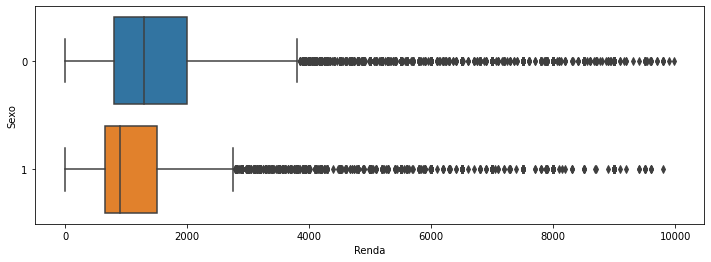

In [ ]:
ax =sns.boxplot(x="Renda", y="Sexo", data= dados.query("Renda<10000"), orient="h")
ax.figure.set_size_inches(12,4)

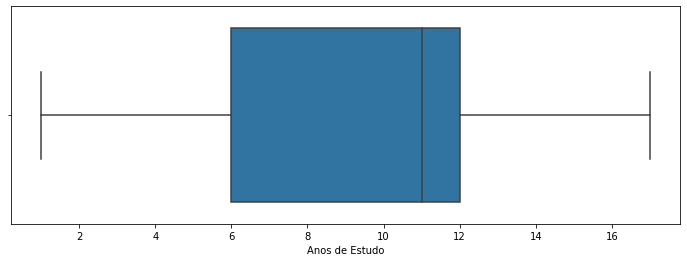

In [ ]:
ax =sns.boxplot(x="Anos de Estudo", data= dados, orient="h")
ax.figure.set_size_inches(12,4)

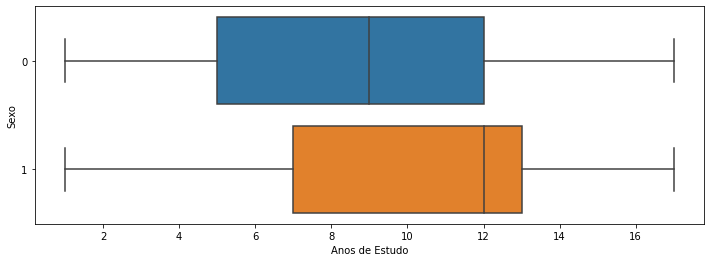

In [ ]:
ax =sns.boxplot(x="Anos de Estudo", y="Sexo", data= dados, orient="h")
ax.figure.set_size_inches(12,4)

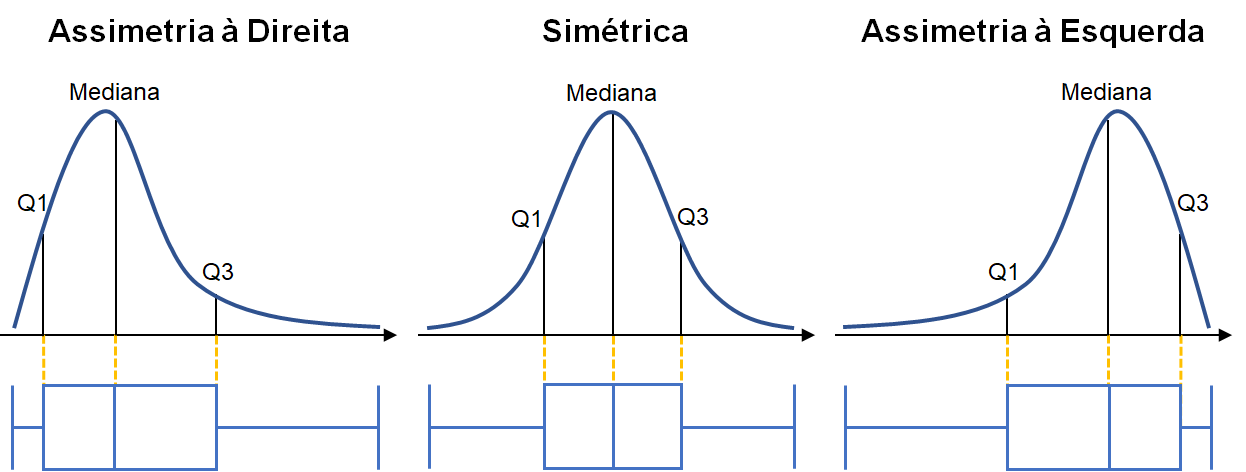

# **05. Medidas de dispersão**

**Desvio médio absoluto**

In [ ]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,6,7
Português,10,5,5
Inglês,4,7,6
Geografia,8,10,5
História,6,4,8
Física,10,5,5
Química,8,6,2


In [ ]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    6.142857
Sicrano     5.428571
dtype: float64

In [ ]:
df.median()

Matérias
Fulano      8.0
Beltrano    6.0
Sicrano     5.0
dtype: float64

In [ ]:
notas_fulano = df['Fulano']
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [ ]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [ ]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [ ]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [ ]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [ ]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


**Variância**

In [ ]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,6,7
Português,10,5,5
Inglês,4,7,6
Geografia,8,10,5
História,6,4,8
Física,10,5,5
Química,8,6,2


In [ ]:
notas_fulano["(Desvio)^2"] = notas_fulano["Desvio"].pow(2) 
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [ ]:
notas_fulano["(Desvio)^2"].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [ ]:
variancia = notas_fulano["Fulano"].var()
variancia 

4.57142857142857

**Desvio padrão**

In [ ]:
import numpy as np

In [ ]:
np.sqrt(variancia)

2.1380899352993947

In [ ]:
desvio_padrao = notas_fulano["Fulano"].std()
desvio_padrao

2.1380899352993947

In [ ]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,6,7
Português,10,5,5
Inglês,4,7,6
Geografia,8,10,5
História,6,4,8
Física,10,5,5
Química,8,6,2


In [ ]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    6.142857
Sicrano     5.428571
dtype: float64

In [ ]:
df.median()

Matérias
Fulano      8.0
Beltrano    6.0
Sicrano     5.0
dtype: float64

In [ ]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8.0,5,5.0
1,NaN,6,NaN


In [ ]:
df.std()

Matérias
Fulano      2.138090
Beltrano    1.951800
Sicrano     1.902379
dtype: float64